# DJA+Grizli Cutout WFSS spectra

Simplified extraction of the grism spectrum for an arbitrary sky position within some WFSS exposure processed with DJA/Grizli.

Totally ignore the full-field contamination model and fit the 2D spectra with flexible spline components to model out continuum / contamination and isolate emission lines.  **No detection image, catalog, segmentation image required!.**

[2025-05-16-simplified_cutout_wfss.ipynb](https://github.com/dawn-cph/dja/blob/master/assets/post_files/2025-05-16-simplified_cutout_wfss.ipynb) Notebook

<a href="https://colab.research.google.com/github/dawn-cph/dja/blob/master/assets/post_files/2025-05-16-simplified_cutout_wfss.ipynb"> <img src="https://colab.research.google.com/assets/colab-badge.svg"> </a>


In [1]:
import os
os.environ['CRDS_CONTEXT'] = "jwst_1322.pmap"
os.environ['NIRCAM_CONF_VERSION'] = "V9"

# Build dependencies

E.g., on Google Colab.

Restart runtime if dependencies installed.

In [2]:
try:
    import grizli
except ImportError:
    # Install dependencies - restart runtime if performed
    ! pip install grizli[aws,jwst] msaexp
    ! pip install git+https://github.com/karllark/dust_attenuation.git

## Environment variables

Requires an AWS account for downloading exposures, though the functionality shouldn't generate any charges.

In [3]:
import os

env = {
    'CRDS_PATH': '/tmp/crds_cache',
    'CRDS_SERVER_URL': 'https://jwst-crds.stsci.edu'
}
for k in env:
    if os.getenv(k) is None:
        print(f'set {k} = {env[k]}')
        os.environ[k] = env[k]

try:
    from google.colab import userdata
    for k in ['AWS_ACCESS_KEY_ID', 'AWS_SECRET_ACCESS_KEY']:
        os.environ[k] = userdata.get(k)
except ImportError:
    pass

if os.getenv('AWS_ACCESS_KEY_ID') is None:
    print('AWS credentials not found.  Set them in the AWS_ACCESS_KEY_ID and AWS_SECRET_ACCESS_KEY environment variables')

set CRDS_PATH = /tmp/crds_cache
set CRDS_SERVER_URL = https://jwst-crds.stsci.edu


## Download config files

In [4]:
from grizli import utils
from grizli.aws import db

CONF_DIR = os.path.join(utils.GRIZLI_PATH, "CONF")
if not os.path.exists(CONF_DIR):
    os.makedirs(CONF_DIR)

utils.fetch_config_files(get_sky=False, get_wfc3=False, get_jwst=True)

if not os.path.exists("fsps_line_templ.fits"):
    db.download_s3_file("s3://grizli-v2/junk/fsps_line_templ.fits")

Set ROOT_PATH=/content
Config directory: /usr/local/lib/python3.11/dist-packages/grizli/data//CONF
Get jwst-grism-conf.tar.gz
Get niriss.conf.220725.tar.gz
Get WFC3IR_extended_PSF.v1.tar.gz
Get PSFSTD_WFC3IR_F105W.fits


 [astropy.io.fits.verify]



Get PSFSTD_WFC3IR_F125W.fits
Get PSFSTD_WFC3IR_F140W.fits
Get PSFSTD_WFC3IR_F160W.fits
Get PSFSTD_WFC3IR_F110W.fits
Get PSFSTD_WFC3IR_F127M.fits


Templates directory: /usr/local/lib/python3.11/dist-packages/grizli/data//templates
Get stars_pickles.npy
Get stars_bpgs.npy
ln -s stars_pickles.npy stars.npy
s3://grizli-v2/junk/fsps_line_templ.fits > ./fsps_line_templ.fits


In [5]:
# GRISM_NIRCAM (N. Pirzkal) for NIRCam
if 1:
    prev = os.getcwd()

    os.chdir(os.path.join(CONF_DIR, 'GRISM_NIRCAM'))

    if not os.path.exists('V9'):
        ! git clone https://github.com/npirzkal/GRISM_NIRCAM.git GRISM_NIRCAM_repo
        ! ln -s GRISM_NIRCAM_repo/* ./
    else:
        print('GRISM_NIRCAM files found')

    os.chdir(prev)

Cloning into 'GRISM_NIRCAM_repo'...
remote: Enumerating objects: 1491, done.
remote: Counting objects: 100% (353/353), done.
remote: Compressing objects: 100% (194/194), done.
remote: Total 1491 (delta 159), reused 353 (delta 159), pack-reused 1138 (from 1)
Receiving objects: 100% (1491/1491), 219.22 MiB | 2.69 MiB/s, done.
Resolving deltas: 100% (710/710), done.
Updating files: 100% (986/986), done.


In [7]:
from grizli import utils, grismconf
grismconf.download_jwst_crds_references()

Use NIRCAM_CONF_VERSION = V9
ENV CRDS_CONTEXT = jwst_1322.pmap


CRDS - INFO -  Fetching  /tmp/crds_cache/mappings/jwst/jwst_system_datalvl_0002.rmap      694 bytes  (1 / 202 files) (0 / 722.8 K bytes)
CRDS - INFO -  Fetching  /tmp/crds_cache/mappings/jwst/jwst_system_calver_0046.rmap    5.2 K bytes  (2 / 202 files) (694 / 722.8 K bytes)
CRDS - INFO -  Fetching  /tmp/crds_cache/mappings/jwst/jwst_system_0045.imap          385 bytes  (3 / 202 files) (5.9 K / 722.8 K bytes)
CRDS - INFO -  Fetching  /tmp/crds_cache/mappings/jwst/jwst_nirspec_wavelengthrange_0024.rmap    1.4 K bytes  (4 / 202 files) (6.3 K / 722.8 K bytes)
CRDS - INFO -  Fetching  /tmp/crds_cache/mappings/jwst/jwst_nirspec_wavecorr_0005.rmap      884 bytes  (5 / 202 files) (7.7 K / 722.8 K bytes)
CRDS - INFO -  Fetching  /tmp/crds_cache/mappings/jwst/jwst_nirspec_superbias_0074.rmap   33.8 K bytes  (6 / 202 files) (8.5 K / 722.8 K bytes)
CRDS - INFO -  Fetching  /tmp/crds_cache/mappings/jwst/jwst_nirspec_sflat_0026.rmap   20.6 K bytes  (7 / 202 files) (42.3 K / 722.8 K bytes)
CRDS - INF

crds_reffiles: NIRCAM F277W GRISMR A (jwst_1322.pmap)
crds_reffiles: jwst_nircam_photom_0162.fits jwst_nircam_specwcs_0186.asdf
ENV CRDS_CONTEXT = jwst_1322.pmap


CRDS - INFO -  Fetching  /tmp/crds_cache/references/jwst/nircam/jwst_nircam_specwcs_0160.asdf    9.3 K bytes  (2 / 2 files) (1.7 M / 1.7 M bytes)
CRDS - INFO -  Fetching  /tmp/crds_cache/references/jwst/nircam/jwst_nircam_specwcs_0171.asdf    9.3 K bytes  (1 / 1 files) (0 / 9.3 K bytes)


crds_reffiles: NIRCAM F277W GRISMR B (jwst_1322.pmap)
crds_reffiles: jwst_nircam_photom_0163.fits jwst_nircam_specwcs_0160.asdf
ENV CRDS_CONTEXT = jwst_1322.pmap


CRDS - INFO -  Fetching  /tmp/crds_cache/references/jwst/nircam/jwst_nircam_specwcs_0174.asdf    9.3 K bytes  (1 / 1 files) (0 / 9.3 K bytes)


crds_reffiles: NIRCAM F277W GRISMC A (jwst_1322.pmap)
crds_reffiles: jwst_nircam_photom_0162.fits jwst_nircam_specwcs_0171.asdf
ENV CRDS_CONTEXT = jwst_1322.pmap


CRDS - INFO -  Fetching  /tmp/crds_cache/references/jwst/nircam/jwst_nircam_specwcs_0184.asdf    9.3 K bytes  (1 / 1 files) (0 / 9.3 K bytes)


crds_reffiles: NIRCAM F277W GRISMC B (jwst_1322.pmap)
crds_reffiles: jwst_nircam_photom_0163.fits jwst_nircam_specwcs_0174.asdf
ENV CRDS_CONTEXT = jwst_1322.pmap


CRDS - INFO -  Fetching  /tmp/crds_cache/references/jwst/nircam/jwst_nircam_specwcs_0199.asdf    9.3 K bytes  (1 / 1 files) (0 / 9.3 K bytes)


crds_reffiles: NIRCAM F356W GRISMR A (jwst_1322.pmap)
crds_reffiles: jwst_nircam_photom_0162.fits jwst_nircam_specwcs_0184.asdf
ENV CRDS_CONTEXT = jwst_1322.pmap


CRDS - INFO -  Fetching  /tmp/crds_cache/references/jwst/nircam/jwst_nircam_specwcs_0165.asdf    9.3 K bytes  (1 / 1 files) (0 / 9.3 K bytes)


crds_reffiles: NIRCAM F356W GRISMR B (jwst_1322.pmap)
crds_reffiles: jwst_nircam_photom_0163.fits jwst_nircam_specwcs_0199.asdf
ENV CRDS_CONTEXT = jwst_1322.pmap


CRDS - INFO -  Fetching  /tmp/crds_cache/references/jwst/nircam/jwst_nircam_specwcs_0182.asdf    9.3 K bytes  (1 / 1 files) (0 / 9.3 K bytes)


crds_reffiles: NIRCAM F356W GRISMC A (jwst_1322.pmap)
crds_reffiles: jwst_nircam_photom_0162.fits jwst_nircam_specwcs_0165.asdf
ENV CRDS_CONTEXT = jwst_1322.pmap


CRDS - INFO -  Fetching  /tmp/crds_cache/references/jwst/nircam/jwst_nircam_specwcs_0178.asdf    9.3 K bytes  (1 / 1 files) (0 / 9.3 K bytes)


crds_reffiles: NIRCAM F356W GRISMC B (jwst_1322.pmap)
crds_reffiles: jwst_nircam_photom_0163.fits jwst_nircam_specwcs_0182.asdf
ENV CRDS_CONTEXT = jwst_1322.pmap


CRDS - INFO -  Fetching  /tmp/crds_cache/references/jwst/nircam/jwst_nircam_specwcs_0164.asdf    9.3 K bytes  (1 / 1 files) (0 / 9.3 K bytes)


crds_reffiles: NIRCAM F410M GRISMR A (jwst_1322.pmap)
crds_reffiles: jwst_nircam_photom_0162.fits jwst_nircam_specwcs_0178.asdf
ENV CRDS_CONTEXT = jwst_1322.pmap


CRDS - INFO -  Fetching  /tmp/crds_cache/references/jwst/nircam/jwst_nircam_specwcs_0181.asdf    9.3 K bytes  (1 / 1 files) (0 / 9.3 K bytes)


crds_reffiles: NIRCAM F410M GRISMR B (jwst_1322.pmap)
crds_reffiles: jwst_nircam_photom_0163.fits jwst_nircam_specwcs_0164.asdf
ENV CRDS_CONTEXT = jwst_1322.pmap
crds_reffiles: NIRCAM F410M GRISMC A (jwst_1322.pmap)
crds_reffiles: jwst_nircam_photom_0162.fits jwst_nircam_specwcs_0181.asdf
ENV CRDS_CONTEXT = jwst_1322.pmap


CRDS - INFO -  Fetching  /tmp/crds_cache/references/jwst/nircam/jwst_nircam_specwcs_0159.asdf    9.3 K bytes  (1 / 1 files) (0 / 9.3 K bytes)
CRDS - INFO -  Fetching  /tmp/crds_cache/references/jwst/nircam/jwst_nircam_specwcs_0190.asdf    9.3 K bytes  (1 / 1 files) (0 / 9.3 K bytes)


crds_reffiles: NIRCAM F410M GRISMC B (jwst_1322.pmap)
crds_reffiles: jwst_nircam_photom_0163.fits jwst_nircam_specwcs_0159.asdf
ENV CRDS_CONTEXT = jwst_1322.pmap
crds_reffiles: NIRCAM F444W GRISMR A (jwst_1322.pmap)
crds_reffiles: jwst_nircam_photom_0162.fits jwst_nircam_specwcs_0190.asdf
ENV CRDS_CONTEXT = jwst_1322.pmap


CRDS - INFO -  Fetching  /tmp/crds_cache/references/jwst/nircam/jwst_nircam_specwcs_0187.asdf    9.3 K bytes  (1 / 1 files) (0 / 9.3 K bytes)
CRDS - INFO -  Fetching  /tmp/crds_cache/references/jwst/nircam/jwst_nircam_specwcs_0173.asdf    9.3 K bytes  (1 / 1 files) (0 / 9.3 K bytes)


crds_reffiles: NIRCAM F444W GRISMR B (jwst_1322.pmap)
crds_reffiles: jwst_nircam_photom_0163.fits jwst_nircam_specwcs_0187.asdf
ENV CRDS_CONTEXT = jwst_1322.pmap


CRDS - INFO -  Fetching  /tmp/crds_cache/references/jwst/nircam/jwst_nircam_specwcs_0203.asdf    9.3 K bytes  (1 / 1 files) (0 / 9.3 K bytes)


crds_reffiles: NIRCAM F444W GRISMC A (jwst_1322.pmap)
crds_reffiles: jwst_nircam_photom_0162.fits jwst_nircam_specwcs_0173.asdf
ENV CRDS_CONTEXT = jwst_1322.pmap


CRDS - INFO -  Fetching  /tmp/crds_cache/references/jwst/nircam/jwst_nircam_specwcs_0191.asdf    9.3 K bytes  (1 / 1 files) (0 / 9.3 K bytes)


crds_reffiles: NIRCAM F444W GRISMC B (jwst_1322.pmap)
crds_reffiles: jwst_nircam_photom_0163.fits jwst_nircam_specwcs_0203.asdf
ENV CRDS_CONTEXT = jwst_1322.pmap


CRDS - INFO -  Fetching  /tmp/crds_cache/references/jwst/nircam/jwst_nircam_specwcs_0179.asdf    9.3 K bytes  (1 / 1 files) (0 / 9.3 K bytes)


crds_reffiles: NIRCAM F460M GRISMR A (jwst_1322.pmap)
crds_reffiles: jwst_nircam_photom_0162.fits jwst_nircam_specwcs_0191.asdf
ENV CRDS_CONTEXT = jwst_1322.pmap


CRDS - INFO -  Fetching  /tmp/crds_cache/references/jwst/nircam/jwst_nircam_specwcs_0195.asdf    9.3 K bytes  (1 / 1 files) (0 / 9.3 K bytes)


crds_reffiles: NIRCAM F460M GRISMR B (jwst_1322.pmap)
crds_reffiles: jwst_nircam_photom_0163.fits jwst_nircam_specwcs_0179.asdf
ENV CRDS_CONTEXT = jwst_1322.pmap


CRDS - INFO -  Fetching  /tmp/crds_cache/references/jwst/nircam/jwst_nircam_specwcs_0169.asdf    9.3 K bytes  (1 / 1 files) (0 / 9.3 K bytes)


crds_reffiles: NIRCAM F460M GRISMC A (jwst_1322.pmap)
crds_reffiles: jwst_nircam_photom_0162.fits jwst_nircam_specwcs_0195.asdf
ENV CRDS_CONTEXT = jwst_1322.pmap


CRDS - INFO -  Fetching  /tmp/crds_cache/references/jwst/nircam/jwst_nircam_specwcs_0192.asdf    9.3 K bytes  (1 / 1 files) (0 / 9.3 K bytes)


crds_reffiles: NIRCAM F460M GRISMC B (jwst_1322.pmap)
crds_reffiles: jwst_nircam_photom_0163.fits jwst_nircam_specwcs_0169.asdf
ENV CRDS_CONTEXT = jwst_1322.pmap


CRDS - INFO -  Fetching  /tmp/crds_cache/references/jwst/nircam/jwst_nircam_specwcs_0197.asdf    9.3 K bytes  (1 / 1 files) (0 / 9.3 K bytes)


crds_reffiles: NIRCAM F480M GRISMR A (jwst_1322.pmap)
crds_reffiles: jwst_nircam_photom_0162.fits jwst_nircam_specwcs_0192.asdf
ENV CRDS_CONTEXT = jwst_1322.pmap


CRDS - INFO -  Fetching  /tmp/crds_cache/references/jwst/nircam/jwst_nircam_specwcs_0180.asdf    9.3 K bytes  (1 / 1 files) (0 / 9.3 K bytes)


crds_reffiles: NIRCAM F480M GRISMR B (jwst_1322.pmap)
crds_reffiles: jwst_nircam_photom_0163.fits jwst_nircam_specwcs_0197.asdf
ENV CRDS_CONTEXT = jwst_1322.pmap


CRDS - INFO -  Fetching  /tmp/crds_cache/references/jwst/nircam/jwst_nircam_specwcs_0168.asdf    9.3 K bytes  (1 / 1 files) (0 / 9.3 K bytes)


crds_reffiles: NIRCAM F480M GRISMC A (jwst_1322.pmap)
crds_reffiles: jwst_nircam_photom_0162.fits jwst_nircam_specwcs_0180.asdf
ENV CRDS_CONTEXT = jwst_1322.pmap
crds_reffiles: NIRCAM F480M GRISMC B (jwst_1322.pmap)
crds_reffiles: jwst_nircam_photom_0163.fits jwst_nircam_specwcs_0168.asdf
ENV CRDS_CONTEXT = jwst_1322.pmap


CRDS - INFO -  Fetching  /tmp/crds_cache/references/jwst/niriss/jwst_niriss_photom_0041.fits    3.6 M bytes  (1 / 2 files) (0 / 3.6 M bytes)
CRDS - INFO -  Fetching  /tmp/crds_cache/references/jwst/niriss/jwst_niriss_specwcs_0050.asdf   20.6 K bytes  (2 / 2 files) (3.6 M / 3.6 M bytes)
CRDS - INFO -  Fetching  /tmp/crds_cache/references/jwst/niriss/jwst_niriss_specwcs_0047.asdf   20.6 K bytes  (1 / 1 files) (0 / 20.6 K bytes)


crds_reffiles: NIRISS GR150R F090W A (jwst_1322.pmap)
crds_reffiles: jwst_niriss_photom_0041.fits jwst_niriss_specwcs_0050.asdf
ENV CRDS_CONTEXT = jwst_1322.pmap


CRDS - INFO -  Fetching  /tmp/crds_cache/references/jwst/niriss/jwst_niriss_specwcs_0054.asdf   24.4 K bytes  (1 / 1 files) (0 / 24.4 K bytes)


crds_reffiles: NIRISS GR150C F090W A (jwst_1322.pmap)
crds_reffiles: jwst_niriss_photom_0041.fits jwst_niriss_specwcs_0047.asdf
ENV CRDS_CONTEXT = jwst_1322.pmap


CRDS - INFO -  Fetching  /tmp/crds_cache/references/jwst/niriss/jwst_niriss_specwcs_0053.asdf   27.4 K bytes  (1 / 1 files) (0 / 27.4 K bytes)


crds_reffiles: NIRISS GR150R F115W A (jwst_1322.pmap)
crds_reffiles: jwst_niriss_photom_0041.fits jwst_niriss_specwcs_0054.asdf
ENV CRDS_CONTEXT = jwst_1322.pmap


CRDS - INFO -  Fetching  /tmp/crds_cache/references/jwst/niriss/jwst_niriss_specwcs_0056.asdf   27.5 K bytes  (1 / 1 files) (0 / 27.5 K bytes)


crds_reffiles: NIRISS GR150C F115W A (jwst_1322.pmap)
crds_reffiles: jwst_niriss_photom_0041.fits jwst_niriss_specwcs_0053.asdf
ENV CRDS_CONTEXT = jwst_1322.pmap


CRDS - INFO -  Fetching  /tmp/crds_cache/references/jwst/niriss/jwst_niriss_specwcs_0055.asdf   30.5 K bytes  (1 / 1 files) (0 / 30.5 K bytes)


crds_reffiles: NIRISS GR150R F150W A (jwst_1322.pmap)
crds_reffiles: jwst_niriss_photom_0041.fits jwst_niriss_specwcs_0056.asdf
ENV CRDS_CONTEXT = jwst_1322.pmap


CRDS - INFO -  Fetching  /tmp/crds_cache/references/jwst/niriss/jwst_niriss_specwcs_0052.asdf   27.5 K bytes  (1 / 1 files) (0 / 27.5 K bytes)


crds_reffiles: NIRISS GR150C F150W A (jwst_1322.pmap)
crds_reffiles: jwst_niriss_photom_0041.fits jwst_niriss_specwcs_0055.asdf
ENV CRDS_CONTEXT = jwst_1322.pmap


CRDS - INFO -  Fetching  /tmp/crds_cache/references/jwst/niriss/jwst_niriss_specwcs_0051.asdf   30.5 K bytes  (1 / 1 files) (0 / 30.5 K bytes)


crds_reffiles: NIRISS GR150R F200W A (jwst_1322.pmap)
crds_reffiles: jwst_niriss_photom_0041.fits jwst_niriss_specwcs_0052.asdf
ENV CRDS_CONTEXT = jwst_1322.pmap
crds_reffiles: NIRISS GR150C F200W A (jwst_1322.pmap)
crds_reffiles: jwst_niriss_photom_0041.fits jwst_niriss_specwcs_0051.asdf


# Imports

Can skip to here if config files and dependencies already installed above.

In [72]:
import os

import numpy as np
import matplotlib.pyplot as plt

import astropy.io.fits as pyfits
import astropy.wcs as pywcs

import grizli.jwst_utils
grizli.jwst_utils.set_quiet_logging()

from grizli.aws import db
from grizli import utils, grismconf
from grizli.aws import sky_wfss

utils.set_warnings()

import grizli
import msaexp

from IPython.display import Image

print('grizli version: ', grizli.__version__)
print('msaexp version: ', msaexp.__version__)


grizli version:  1.12.14
msaexp version:  0.9.8


In [9]:
from importlib import reload
reload(sky_wfss)

prefix = 'dja-grism'
kwargs = {}

# Segmentation image for NIRISS demo
if not os.path.exists('gds-sw-grizli-v7.0-ir_seg.fits'):
    ! wget https://s3.amazonaws.com/grizli-v2/JwstMosaics/v7/gds-sw-grizli-v7.0-ir_seg.fits.gz
    ! gunzip gds-sw-grizli-v7.0-ir_seg.fits.gz

--2025-05-16 19:27:21--  https://s3.amazonaws.com/grizli-v2/JwstMosaics/v7/gds-sw-grizli-v7.0-ir_seg.fits.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 3.5.9.70, 54.231.192.120, 16.182.105.32, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|3.5.9.70|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5996324 (5.7M) [binary/octet-stream]
Saving to: ‘gds-sw-grizli-v7.0-ir_seg.fits.gz’

gds-sw-grizli-v7.0- 100%[===================>]   5.72M  14.4MB/s    in 0.4s    

2025-05-16 19:27:22 (14.4 MB/s) - ‘gds-sw-grizli-v7.0-ir_seg.fits.gz’ saved [5996324/5996324]



# Set source and extract spectrum

All you really need to specify is a set of target coordinates ``(ra, dec)`` and a list of the desired grism names to search for.  

The script
1. Queries and downloads all DJA-processed exposures whose corner footprint contains the requested point.  Note that there might not be a usable spectrum in a particular exposure if the nominal coordinate is within the WCS "footprint" of the grism exposure but the dispersed spectrum falls off of the detector.
2. Pulls a FITS cutout from the DJA/grizli API to use for the direct image.  No direct image is needed for the basic extraction and redshift fitting, which here uses a simplified Gaussian model for the optimal extractions, but the direct image is needed for the full grizli functionality (line maps, etc.)
3. Generates a `grizli.multifit.MultiBeam` object of 2D cutouts from the grism exposures.

## NIRISS

If a `segmentation_image` is provided, the source ID will be read from the specified target coordinates and the segmentation image will be used for a crude zeroth-order mask.

https://grizli-cutout.herokuapp.com/exposures?polygon=rect(53.166632,-27.869037,0.25)&filters=F115W-GR150R,F150W-GR150R,F200W-GR150R&output=csv
extract_from_coords: dja-grism_033239.99-275208.53 27 exposures
./jw01283005001_04201_00001_nis_rate.fits exists
./jw01283005001_04201_00002_nis_rate.fits exists
./jw01283005001_04201_00003_nis_rate.fits exists
./jw01283005001_04201_00004_nis_rate.fits exists
./jw01283005001_04201_00005_nis_rate.fits exists
./jw01283005001_04201_00006_nis_rate.fits exists
./jw01283005001_04201_00007_nis_rate.fits exists
./jw01283005001_04201_00008_nis_rate.fits exists
./jw01283005001_04201_00009_nis_rate.fits exists
./jw01283005001_09201_00001_nis_rate.fits exists
./jw01283005001_09201_00002_nis_rate.fits exists
./jw01283005001_09201_00003_nis_rate.fits exists
./jw01283005001_09201_00004_nis_rate.fits exists
./jw01283005001_09201_00005_nis_rate.fits exists
./jw01283005001_09201_00006_nis_rate.fits exists
./jw01283005001_09201_00007_nis_rate.fits exists
./jw0128

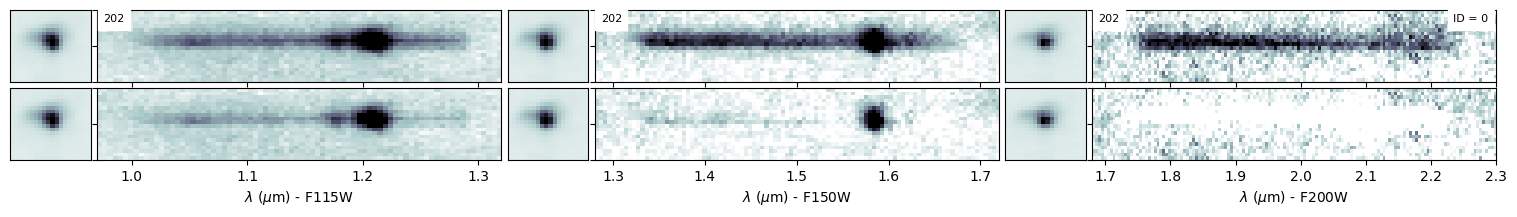

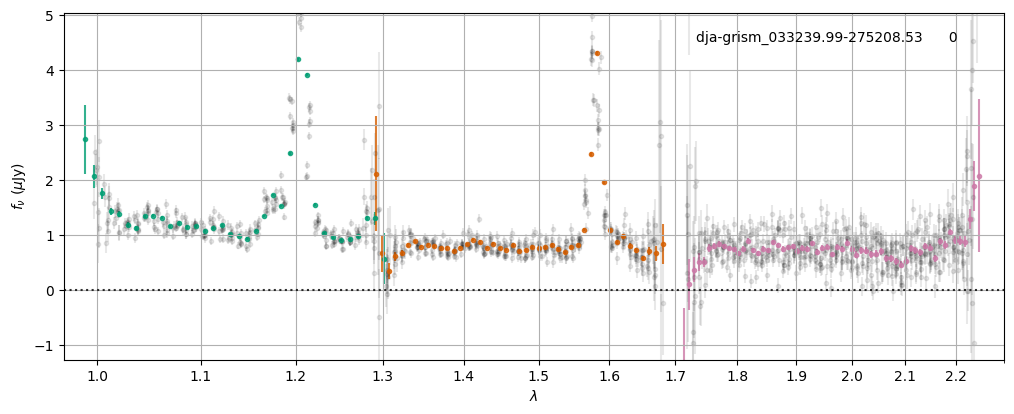

In [22]:
reload(sky_wfss)

## NIRISS test
ra, dec = 53.1666323, -27.8690371 # multiple lines

# segmentation_image = "gds-sw-grizli-v7.0-ir_seg.fits"
segmentation_image = None

mb = sky_wfss.extract_from_coords(
    ra=ra, dec=dec,
    grisms=['F115W-GR150R','F115W-GR150C','F150W-GR150R','F150W-GR150C','F200W-GR150R','F200W-GR150C'][0::2],
    size=24,
    grp=None,
    clean=False,
    get_cutout=1,
    cutout_filter=','.join(['F150W-CLEAR','F150WN-CLEAR','F200W-CLEAR','F200WN-CLEAR'][:]), # Direct image filters
    thumbnail_size=0.8 * 4,
    prefix=prefix,
    mb_kwargs={"min_sens": 0.0, "min_mask": 0.0},
    filter_kwargs=[{}, None][1],
    verbose=True,
    local=False,
    segmentation_image=segmentation_image,
    use_jwst_crds=True,
    **kwargs
)

### Fit redshift

This script tries to fit flexible functions to account for the contamination, and uses a simplified compact Gaussian profile to use for the optimal extraction.  These are crude approximations, but actually tend to work acceptably for emission lines with reasonable S/N.

final spectrum file: dja-grism_033239.99-275208.53.f115w.spec.fits
final spectrum file: dja-grism_033239.99-275208.53.f150w.spec.fits
final spectrum file: dja-grism_033239.99-275208.53.f200w.spec.fits
redshift_fit_1d dja-grism_033239.99-275208.53 z=[0.492, 4.226] dz=0.0013333333333333333  nsteps=941
redshift_fit_1d dja-grism_033239.99-275208.53 best z=1.41168  dlnP=2526.9
redshift_fit_1d dja-grism_033239.99-275208.53 F115W dlnP=1375.5
redshift_fit_1d dja-grism_033239.99-275208.53 F150W dlnP=1151.6
redshift_fit_1d dja-grism_033239.99-275208.53 F200W dlnP=-0.1


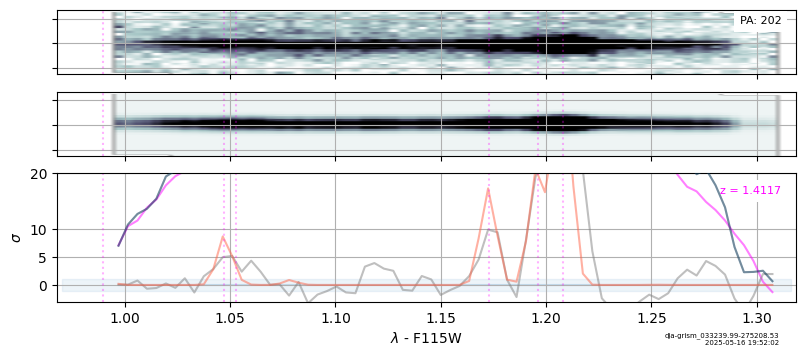

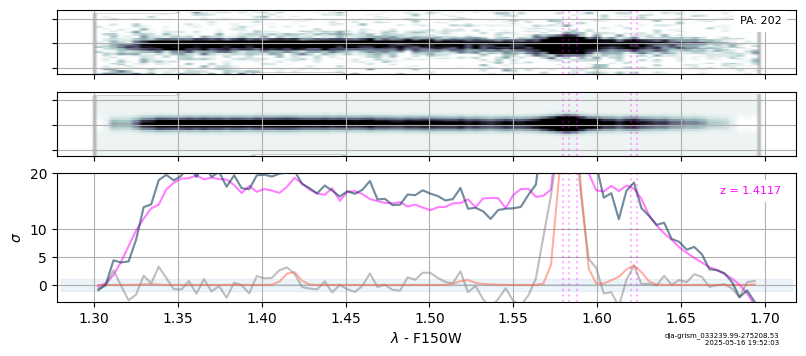

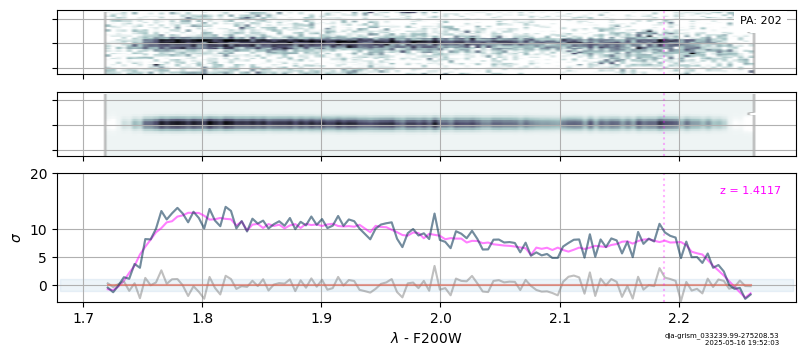

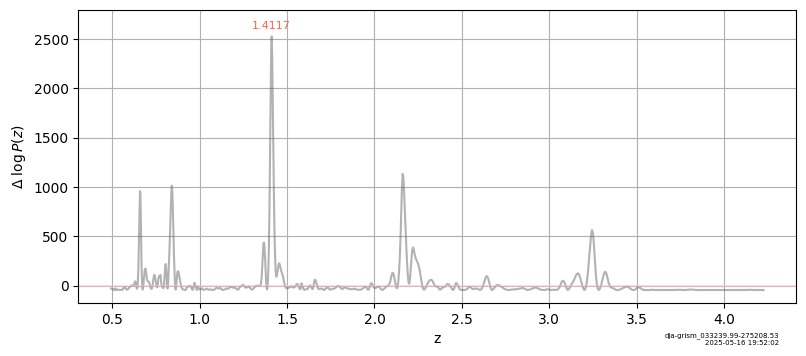

In [23]:
from importlib import reload
reload(sky_wfss)

dv = 800 # line width for fitting, km/s

b2d, zres = sky_wfss.combine_beams_2d(
    mb,
    step=0.5, pixfrac=0.75, # 2D "pseudodrizzle" parameters
    ymax=12.5,
    profile_sigma=1.5, profile_offset=-0.5, profile_type="gaussian",     # Gaussian cross-dispersion model
    # profile_type="grizli",                                             # Estimate a profile using the direct image
    bkg_percentile=None,
    # cont_spline=11, zfit_nspline=-1,  # Remove all contamination *before* fitting
    cont_spline=0, zfit_nspline=11,     # Fit with flexible splines to model contamination
    zfit_kwargs=dict(
        rest_wave=[6500, 4400], # Halpha - OIII
        velocity_sigma=dv,
        dz=dv/3.e5/2,
    ),
    ylim=(-3, 20), yticks=[0, 5, 10, 20],
    auto_niriss=False,
)


### Use original grizli tools to make line maps, measure line fluxes, etc.

Though it still doesn't have a full contamination model....

Saved arguments to fit_args.npy.


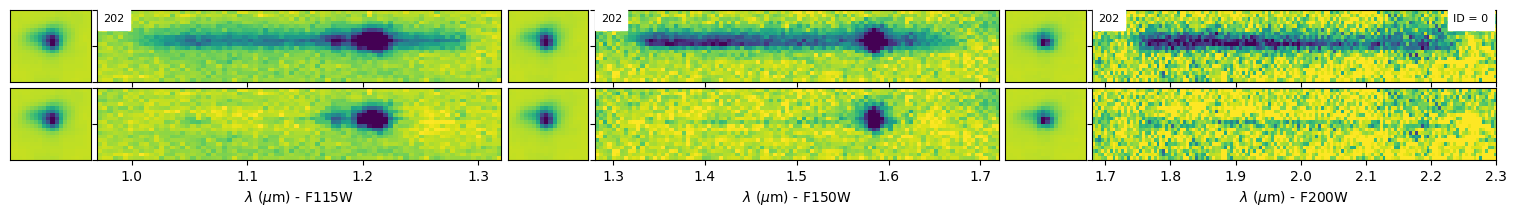

In [26]:
templ = utils.load_templates(line_complexes=False, fwhm=1500)
splw = np.arange(9000, 3.e4, 5)
bspl = utils.bspline_templates(splw, df=31)
for t in templ:
    if t.startswith('line'):
        bspl[t] = templ[t]

tfit = mb.template_at_z(z=zres['z'], templates=bspl, fitter='lstsq')
_ = mb.drizzle_grisms_and_PAs(tfit=tfit, diff=True, kernel='point',)

if not os.path.exists('fit_args.npy'):
    from grizli.pipeline import auto_script
    fit_args = auto_script.generate_fit_params(include_photometry=False)


Run id=0 with fit_args.npy
load_master_fits: dja-grism_033239.99-275208.53.beams.fits
load_new_sensitivity_curve: only defined for NIRCAM (NIRISS)
1 ./jw01283005001_04201_00001_nis_rate.fits GR150R
load_new_sensitivity_curve: only defined for NIRCAM (NIRISS)
2 ./jw01283005001_04201_00002_nis_rate.fits GR150R
load_new_sensitivity_curve: only defined for NIRCAM (NIRISS)
3 ./jw01283005001_04201_00003_nis_rate.fits GR150R
load_new_sensitivity_curve: only defined for NIRCAM (NIRISS)
4 ./jw01283005001_04201_00004_nis_rate.fits GR150R
load_new_sensitivity_curve: only defined for NIRCAM (NIRISS)
5 ./jw01283005001_04201_00005_nis_rate.fits GR150R
load_new_sensitivity_curve: only defined for NIRCAM (NIRISS)
6 ./jw01283005001_04201_00006_nis_rate.fits GR150R
load_new_sensitivity_curve: only defined for NIRCAM (NIRISS)
7 ./jw01283005001_04201_00007_nis_rate.fits GR150R
load_new_sensitivity_curve: only defined for NIRCAM (NIRISS)
8 ./jw01283005001_04201_00008_nis_rate.fits GR150R
load_new_sensitivi

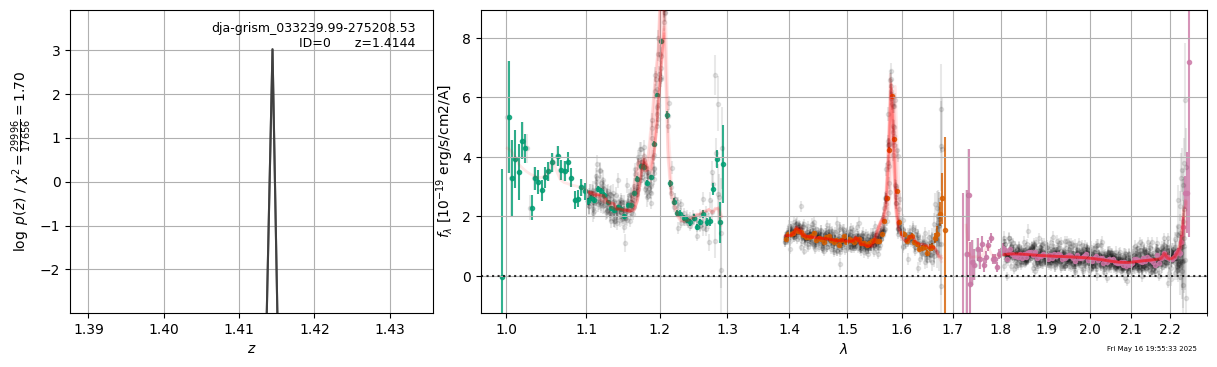

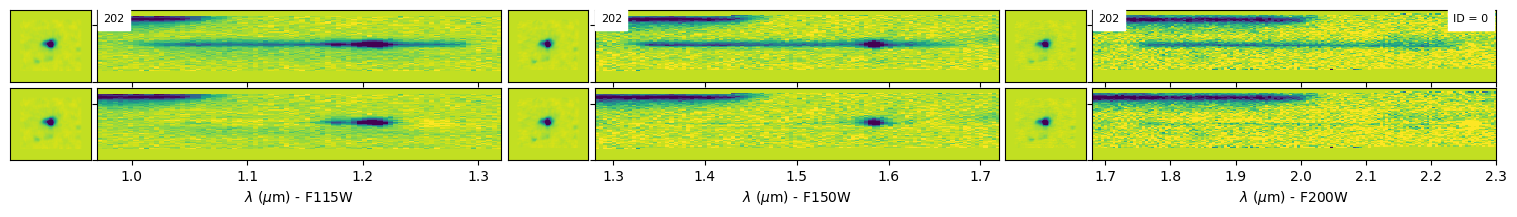

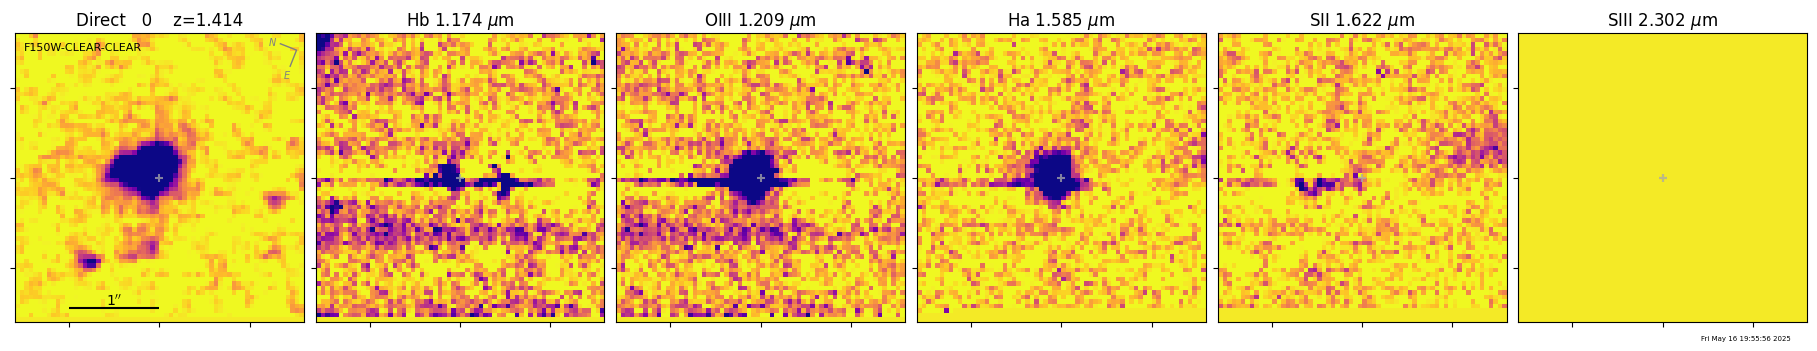

In [27]:
# Line map
# mb.drizzle_fit_lines?
# ! ls dja-grism_100014.21+021311.88*

dz = 0.01*(1+zres['z'])

from grizli import fitting, multifit
_ = fitting.run_all_parallel(
    0,
    file_pattern=mb.group_name,
    group_name=mb.group_name,
    get_output_data=True,
    fit_trace_shift=False,
    # zr=(zres['z'], ),                                 # Fix redshift
    zr=zres['z'] + np.array([-1,1])*0.01*(1+zres['z']), # Refit redshift in small range around best fit from above
    verbose=True,
    protect=False,
    # dscale=1./16/8, scale_linemap=4 / 4,
    min_sens=1.e-4, min_cont=1.e-4,
    t0=bspl,
    t1=bspl,
    pline={
        'kernel': 'square',
        'pixfrac': 0.5,
        'pixscale': 0.05,
        'size': 8,
        'wcs': None,
        # aligned with dispersion
        'theta': 270 - mb.beams[0].get_dispersion_PA(decimals=2),
    },
)

## NIRCam

Example [OIII] / H$\alpha$ emitters with a PRISM spectrum.



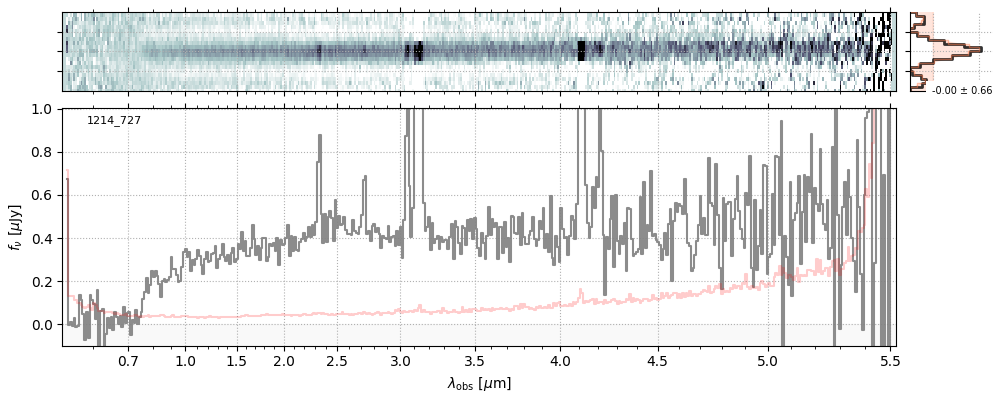

In [94]:
ra, dec, prism_file = 150.1069005, 2.36004609, "cosmos-transients-v4_prism-clear_6585_61234.spec.fits"
ra, dec, prism_file = 150.09900755, 2.34362213, "glazebrook-cos-obs2-v4_prism-clear_2565_15420.spec.fits"
prism_file, ra, dec = 'gto-wide-cos02-v4_prism-clear_1214_727.spec.fits', 150.07850493, 2.35235787

# Show the prism spectrum
prism_mask = prism_file.split("_prism")[0]

Image(f"https://s3.amazonaws.com/msaexp-nirspec/extractions/{prism_mask}/{prism_file.replace('spec.fits', 'fnu.png')}")

https://grizli-cutout.herokuapp.com/exposures?polygon=rect(150.078505,2.352358,0.25)&filters=F356W-GRISMR,F430M-GRISMR,F410M-GRISMR,F444W-GRISMR,F444W-GRISMC,F480M-GRISMR,F480M-GRISMC&output=csv
extract_from_coords: dja-grism_100018.84+022108.49 10 exposures
./jw05893014003_02101_00001_nrcblong_rate.fits exists
./jw05893014004_02101_00003_nrcblong_rate.fits exists
./jw05893014004_02101_00004_nrcblong_rate.fits exists
./jw05893014004_02101_00005_nrcblong_rate.fits exists
./jw05893014004_02101_00006_nrcblong_rate.fits exists
./jw05893014003_02101_00002_nrcblong_rate.fits exists
./jw05893014003_02101_00003_nrcblong_rate.fits exists
./jw05893014003_02101_00004_nrcblong_rate.fits exists
./jw05893014003_02101_00005_nrcblong_rate.fits exists
./jw05893014003_02101_00006_nrcblong_rate.fits exists
https://grizli-cutout.herokuapp.com/thumb?all_filters=False&filters=f277w-clear,f356w-clear,f444w-clear&ra=150.07850493&dec=2.35235787&size=1.6&output=fits_weight -> dja-grism_100018.84+022108.49_ir.fi

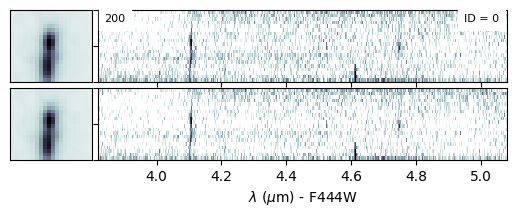

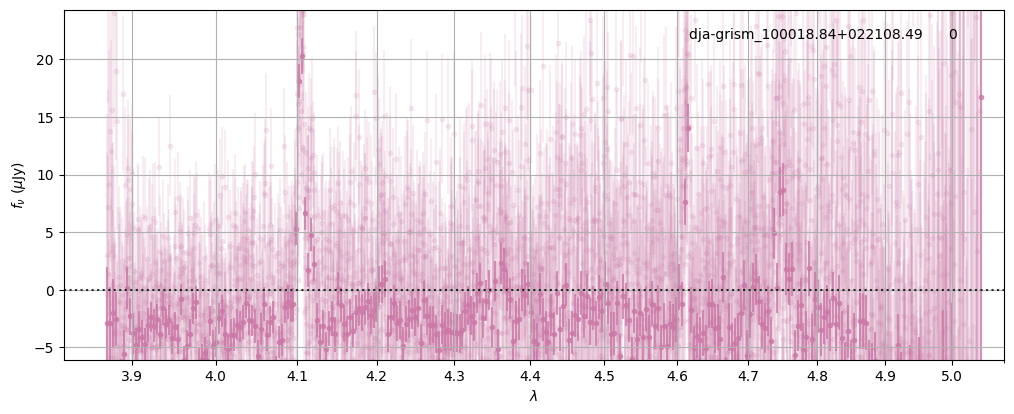

In [95]:
mb = sky_wfss.extract_from_coords(
    ra=ra,
    dec=dec,
    grisms=['F356W-GRISMR','F430M-GRISMR','F410M-GRISMR','F444W-GRISMR','F444W-GRISMC','F480M-GRISMR','F480M-GRISMC'],
    size=48+32*1,
    grp=None,
    clean=False,
    get_cutout=1,
    cutout_filter=','.join(['F200W-CLEAR','F277W-CLEAR','F356W-CLEAR','F444W-CLEAR'][-3:]), #[::1][-1:]),
    thumbnail_size=0.8 * 2,
    prefix=prefix,
    mb_kwargs={},
    filter_kwargs=[{}, None][1],
    verbose=True,
    local=False,
    use_jwst_crds=False,
    **kwargs
)

Contamination or background over-subtraction can look troublesome, but can still find the line using the flexible contamination / continuum model

final spectrum file: dja-grism_100018.84+022108.49.f444w.spec.fits


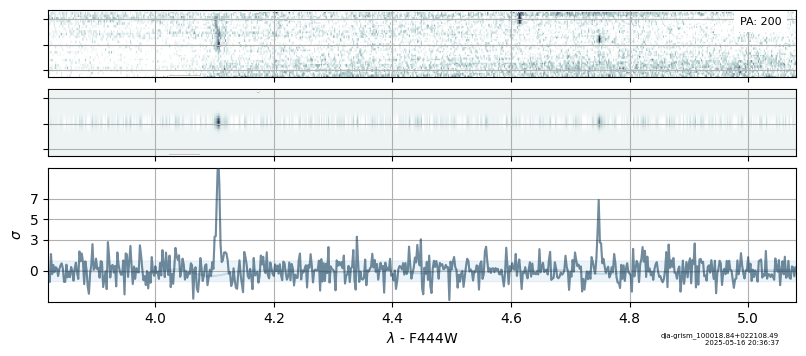

In [97]:
# Just show the simplified 1D extraction

from importlib import reload
reload(sky_wfss)

dv = 50 * 3

b2d, zres = sky_wfss.combine_beams_2d(
    mb,
    step=0.5, pixfrac=0.75,
    ymax=12.5,
    profile_sigma=1.5, profile_offset=-0.5, profile_type="gaussian",     # Gaussian cross-dispersion model
    # profile_type="grizli",                                   # Use the direct image thumbnail
    bkg_percentile=None,
    cont_spline=31*1, zfit_nspline=-1,
    zfit_kwargs=None,
)


final spectrum file: dja-grism_100018.84+022108.49.f444w.spec.fits
redshift_fit_1d dja-grism_100018.84+022108.49 z=[4.618, 9.582] dz=0.00025  nsteps=2534
redshift_fit_1d dja-grism_100018.84+022108.49 best z=5.25520  dlnP=113.8
redshift_fit_1d dja-grism_100018.84+022108.49 F444W dlnP=113.8


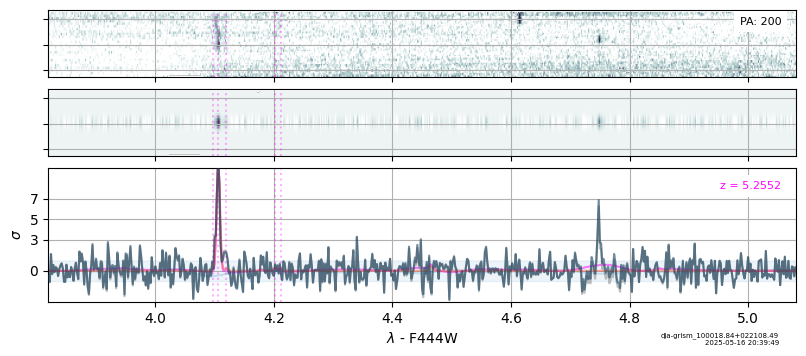

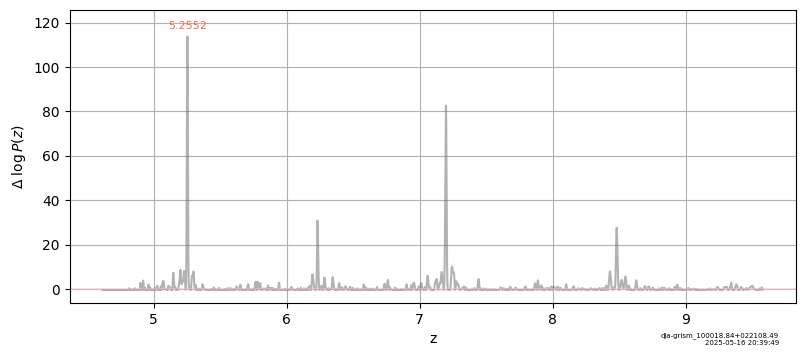

In [104]:
# Do the redshift fit

dv = 150 # km/s

b2d, zres = sky_wfss.combine_beams_2d(
    mb,
    step=0.5, pixfrac=0.75,
    ymax=12.5,
    profile_sigma=1.5, profile_offset=-0.5, profile_type="gaussian",     # Gaussian cross-dispersion model
    # profile_type="grizli",                                   # Use the direct image thumbnail
    bkg_percentile=None,
    cont_spline=31*1, zfit_nspline=-1,
    # cont_spline=0, zfit_nspline=31,
    zfit_kwargs=dict(
        rest_wave=[6800, 4800], # Halpha - OIII
        velocity_sigma=dv,
        dz=dv/3.e5/2,
    ),
)

### Compare to PRISM spectrum

In [105]:
# Prism spectrum
import msaexp.spectrum
prism = msaexp.spectrum.SpectrumSampler(
    f"https://s3.amazonaws.com/msaexp-nirspec/extractions/{prism_mask}/{prism_file}"
)

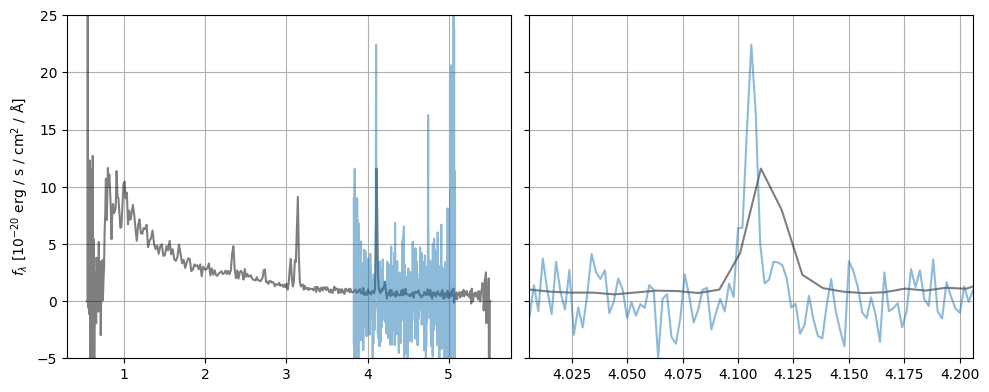

In [115]:

fig, axes = plt.subplots(1,2,figsize=(10, 4), sharey=True)
for ax in axes:
    ax.plot(prism['wave'], prism['flux'] * prism['to_flam'], label=prism_file, color='k', alpha=0.5)

    for gr in b2d:
        grism = b2d[gr]['spec']
        for PA in mb.PA[gr]:
            ix = mb.PA[gr][PA][0]
            break

        sens = np.interp(grism['wave']*1.e4, mb.beams[ix].beam.lam, mb.beams[ix].beam.sensitivity)
        trim = sens > 0.05*sens.max()
        ax.plot(grism['wave'][trim], (grism['flux'] / sens)[trim] * 1.e20, label=gr, alpha=0.5)

    ax.set_ylim(-5, 25)
    ax.grid()

for lrest in [5008, 6564.]:
    lobs = lrest * (1 + zres['z']) / 1.e4
    if lobs > grism['wave'].min():
        ax.set_xlim(lobs - 0.1, lobs + 0.1)
        break

axes[0].set_ylabel(r'$f_\lambda$ [$10^{-20}$ erg$~$/$~$s$~$/$~$cm$^2~$/$~\mathrm{\AA}$]')
# ax.set_xlim(3.8, 4.2)
# ax.set_xlim(4.5, 5.0)
fig.tight_layout(pad=1)

### Line map

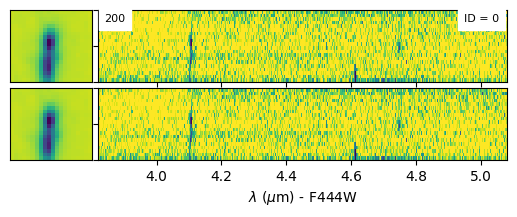

In [108]:
templ = utils.load_templates(line_complexes=False, fwhm=150)
splw = np.arange(9000, 3.e4, 5)
bspl = utils.bspline_templates(splw, df=31)
for t in templ:
    if t.startswith('line'):
        bspl[t] = templ[t]

tfit = mb.template_at_z(z=zres['z'], templates=bspl, fitter='lstsq')
_ = mb.drizzle_grisms_and_PAs(tfit=tfit, diff=True, kernel='point',)

if not os.path.exists('fit_args.npy'):
    from grizli.pipeline import auto_script
    fit_args = auto_script.generate_fit_params(include_photometry=False)


Run id=0 with fit_args.npy
load_master_fits: dja-grism_100018.84+022108.49.beams.fits
1 ./jw05893014003_02101_00001_nrcblong_rate.fits F444W
2 ./jw05893014003_02101_00002_nrcblong_rate.fits F444W
3 ./jw05893014003_02101_00003_nrcblong_rate.fits F444W
4 ./jw05893014003_02101_00004_nrcblong_rate.fits F444W
5 ./jw05893014003_02101_00005_nrcblong_rate.fits F444W
6 ./jw05893014003_02101_00006_nrcblong_rate.fits F444W
User templates! N=71 

Cache rest-frame template:  bspl 0 9000
Cache rest-frame template:  bspl 1 9340
Cache rest-frame template:  bspl 2 9830
Cache rest-frame template:  bspl 3 10500
Cache rest-frame template:  bspl 4 11250
Cache rest-frame template:  bspl 5 12000
Cache rest-frame template:  bspl 6 12750
Cache rest-frame template:  bspl 7 13500
Cache rest-frame template:  bspl 8 14250
Cache rest-frame template:  bspl 9 15000
Cache rest-frame template:  bspl 10 15750
Cache rest-frame template:  bspl 11 16500
Cache rest-frame template:  bspl 12 17250
Cache rest-frame template:  

  axz.set_xlim(zmi, zma)

2025-05-16 20:52:17,962 - stpipe - WARNING - /usr/local/lib/python3.11/dist-packages/grizli/fitting.py:4217: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  axz.set_xlim(zmi, zma)

  axz.set_xlim(zmi, zma)

  axz.set_xlim(zmi, zma)

2025-05-16 20:52:19,515 - stpipe - WARNING - /usr/local/lib/python3.11/dist-packages/grizli/fitting.py:944: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  axz.set_xlim(zmi, zma)

  axz.set_xlim(zmi, zma)



Drizzle line -> OII-7325 (-0.85 0.23)
Drizzle line -> ArIII-7138 (-0.41 0.18)
Drizzle line -> SII  (0.01 0.22)
Drizzle line -> Ha   (2.97 0.16)
Drizzle line -> OI-6302 (-1.05 0.19)
dja-grism_100018.84+022108.49_00000.full.fits


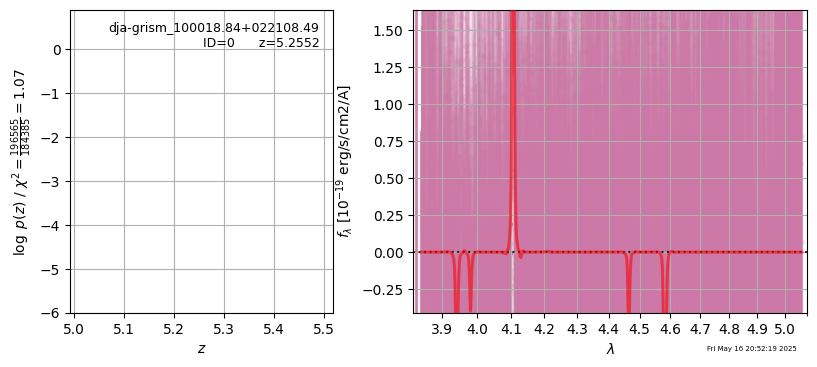

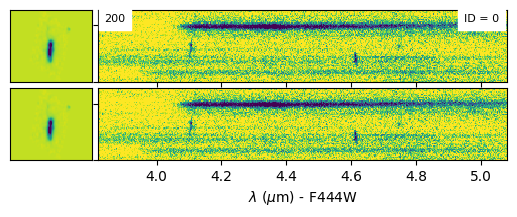

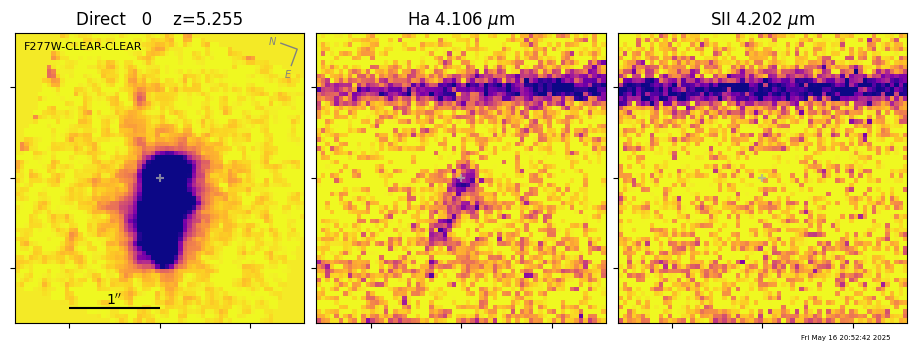

In [116]:
# Line map
# mb.drizzle_fit_lines?
# ! ls dja-grism_100014.21+021311.88*

fit_res = fitting.run_all_parallel(
    0,
    file_pattern=mb.group_name,
    group_name=mb.group_name,
    get_output_data=True,
    fit_trace_shift=False,
    zr=(zres['z'], ),                                 # Fix redshift
    # zr=zres['z'] + np.array([-1,1])*0.001*(1+zres['z']), # Refit redshift in small range around best fit from above
    verbose=True,
    protect=False,
    # dscale=1./16/8, scale_linemap=4 / 4,
    min_sens=1.e-4, min_cont=1.e-4,
    t0=bspl,
    t1=bspl,
    pline={
        'kernel': 'square',
        'pixfrac': 0.5,
        'pixscale': 0.05,
        'size': 8,
        'wcs': None,
        # aligned with dispersion
        'theta': 270 - mb.beams[0].get_dispersion_PA(decimals=2),
    },
)